In [100]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [83]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [84]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [87]:
data.notnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
201,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
202,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
203,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [88]:
# regression can only be applied to numerical values so selecting only numerical values

numerical_cols = [
    'symboling',
    'wheelbase',
    'carlength',
    'carwidth',
    'carheight',
    'curbweight',
    'enginesize',
    'boreratio',
    'stroke',
    'compressionratio',
    'horsepower',
    'peakrpm',
    'citympg',
    'highwaympg',
    'price'
]

d = data[numerical_cols]

In [89]:
d.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [90]:
# no of unique values in each column

d.nunique(axis=0)

symboling             6
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginesize           44
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [91]:
# dropping symboling cuz it has only 6 values --> (distinct and uncorrelated values must be dropped out)

d = d.drop(['symboling'], axis=1)
d.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


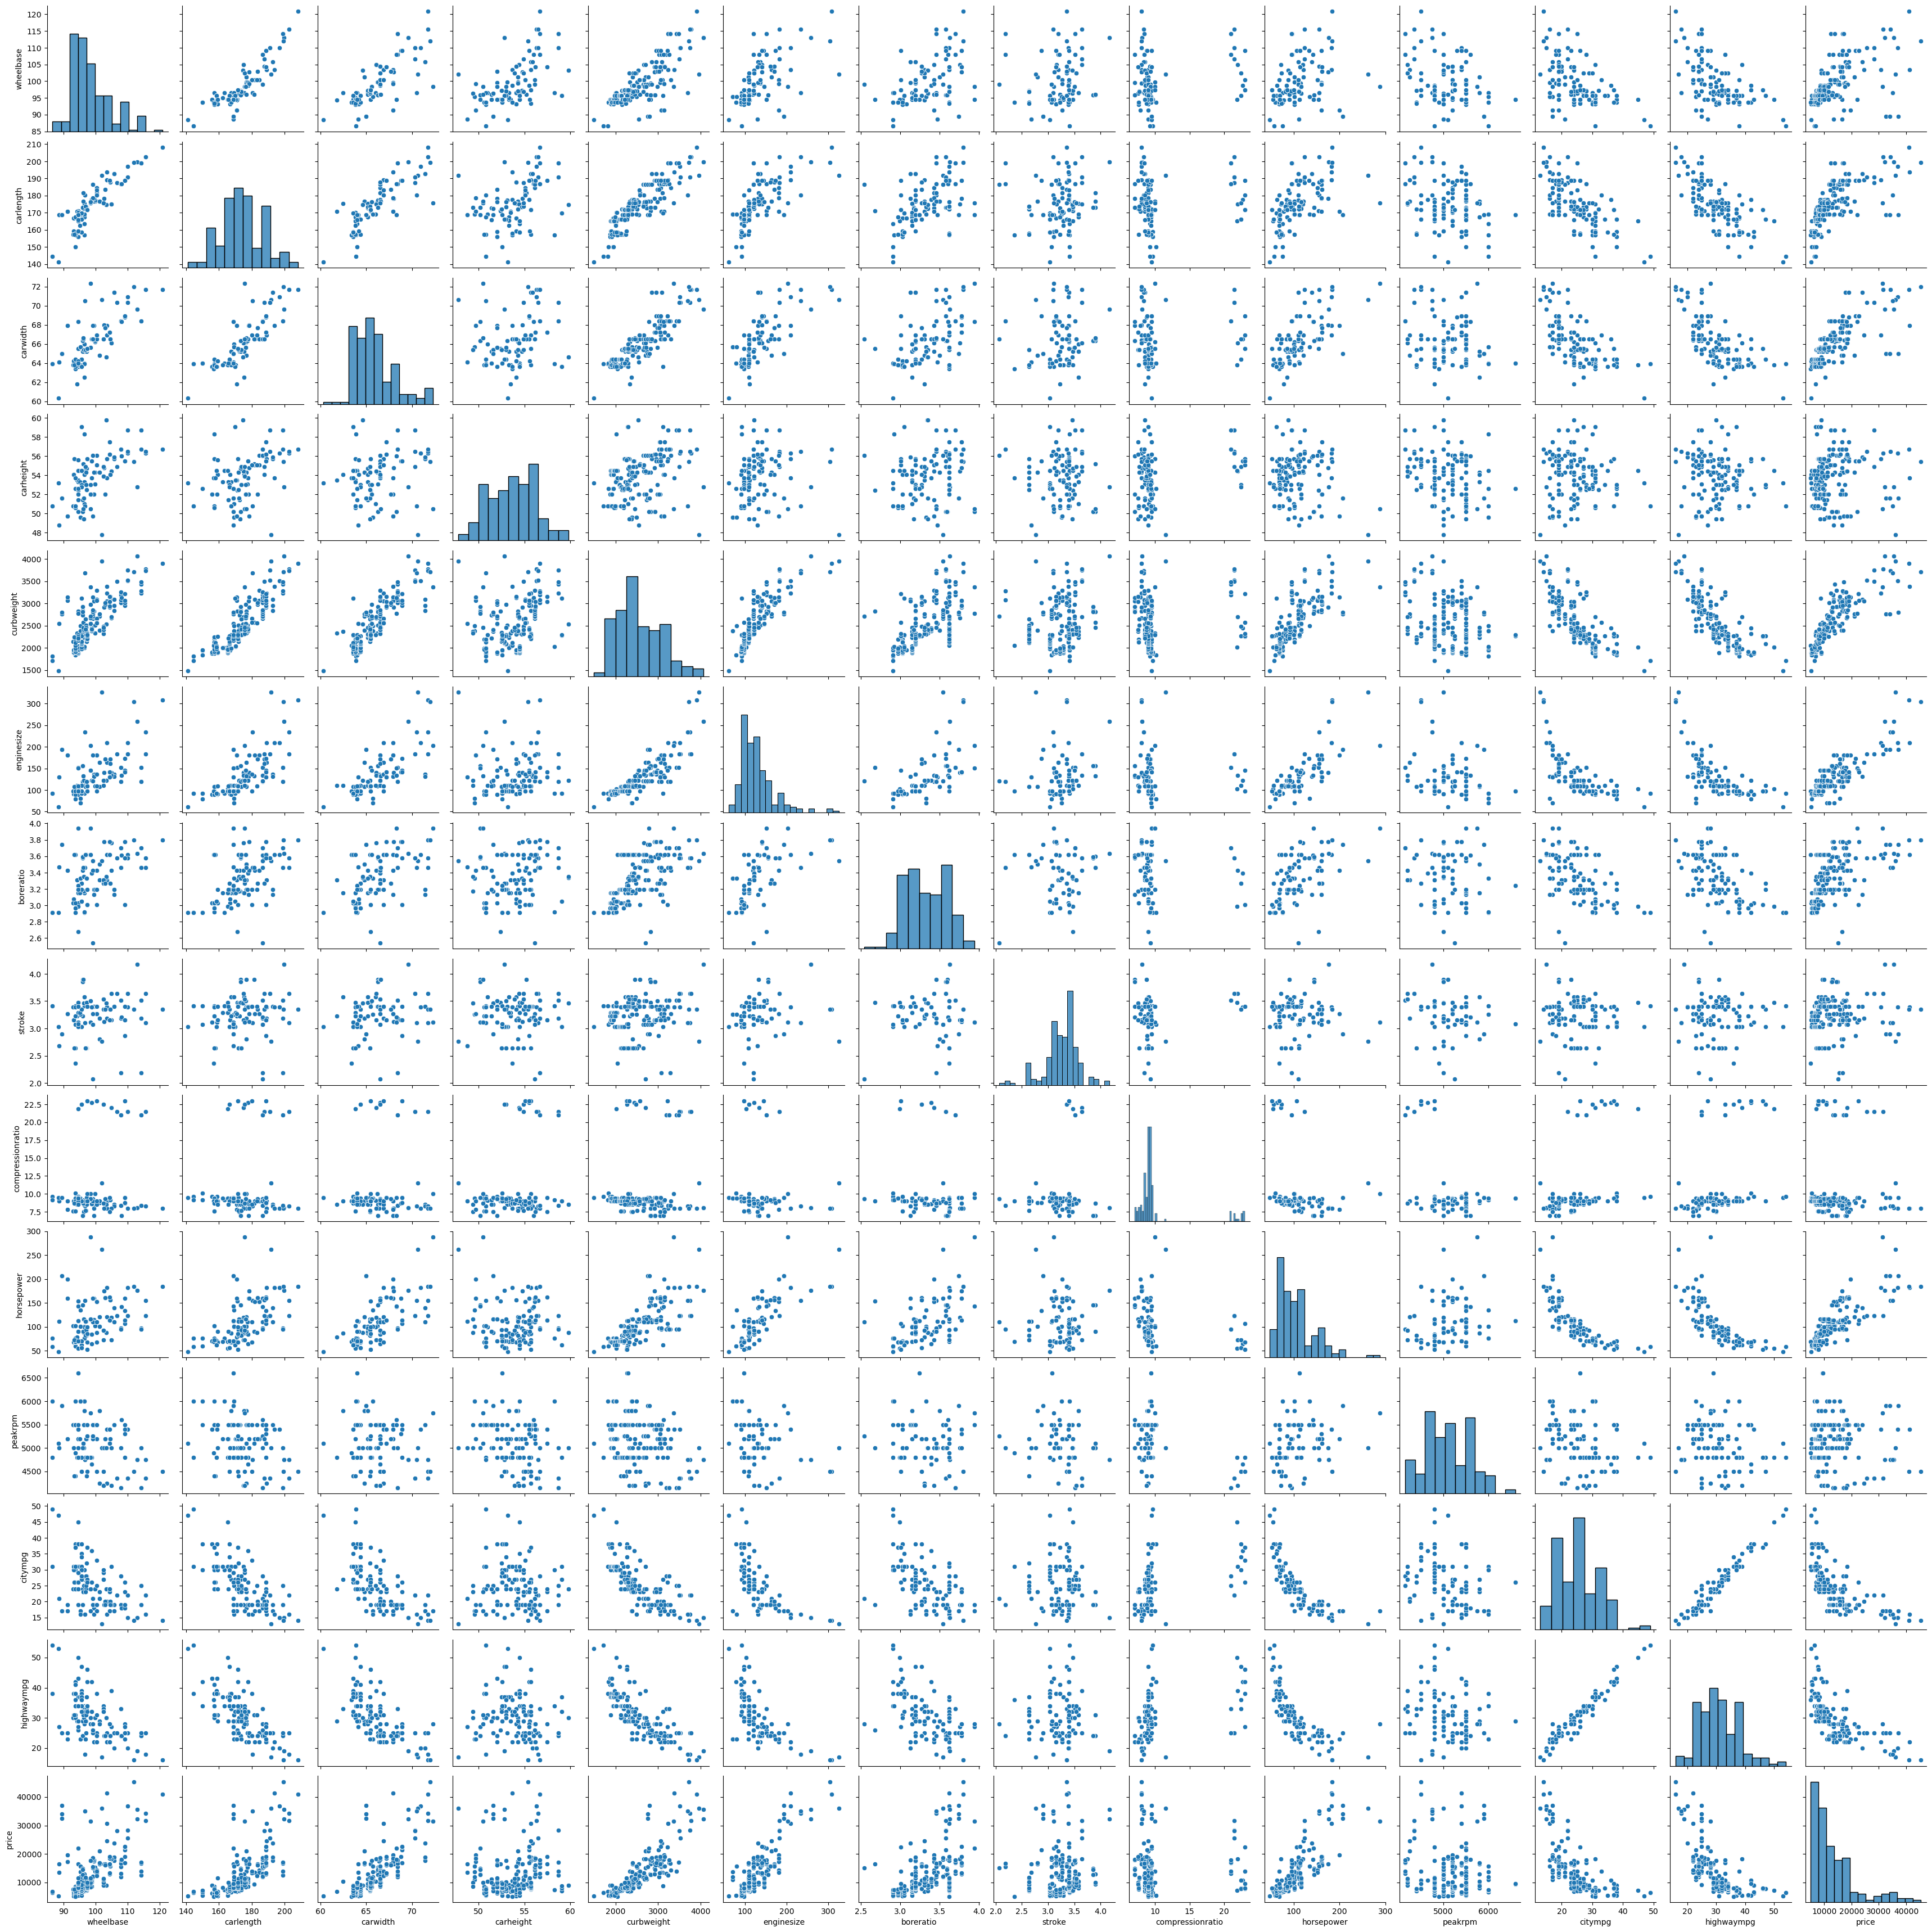

In [92]:
sns.pairplot(d)

In [93]:
# creating the correlating matrix

cor_matrix = d.corr()
cor_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

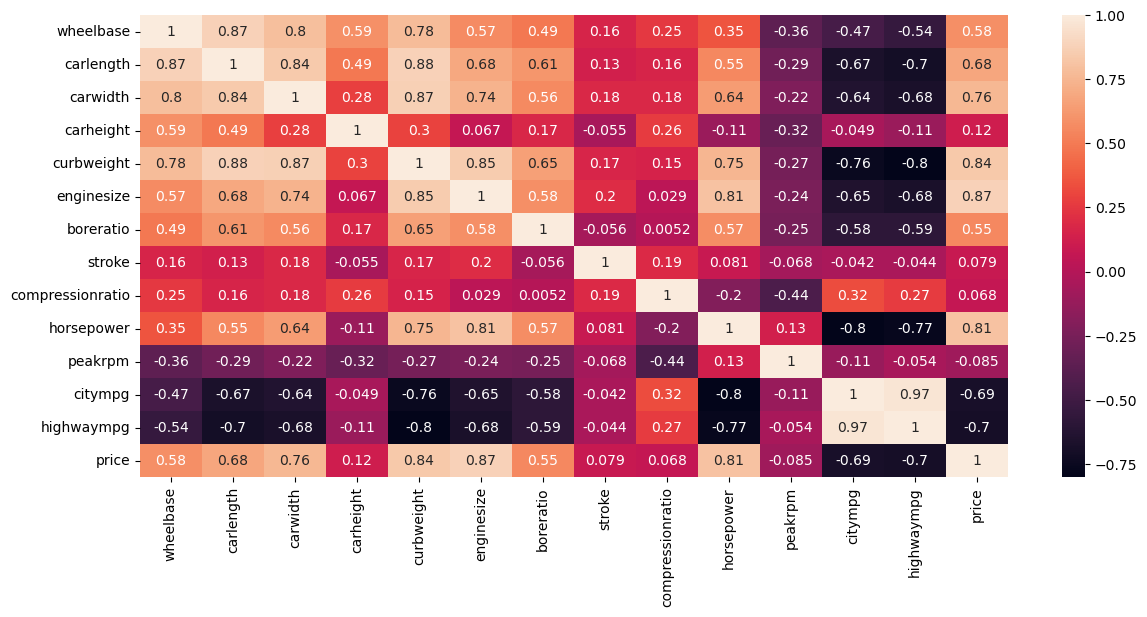

In [94]:
# setting the figure size

plt.figure(figsize=(14, 6))
sns.heatmap(cor_matrix, annot=True)

In [95]:
# dropping the uncorrelated values [peakrpm, citympg, highwaympg]

d = d.drop(['peakrpm', 'citympg', 'highwaympg'], axis=1)
d

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,22470.0


In [101]:
# scaling the data

sd = normalize(d, axis=0) # setting axis to normalize by feature

scaled_data = pd.DataFrame(sd, columns=d.columns)

In [102]:
# selecting the features and labels

X = scaled_data.iloc[::, :10]
y = scaled_data.iloc[::, 10:]
y

,price
0,0.060868
1,0.074422
2,0.074422
3,0.062920
4,0.078707
...,...
200,0.075978
201,0.085901
202,0.096906
203,0.101349


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
X_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower
124,0.067698,0.069329,0.070222,0.065194,0.075472,0.081594,0.075055,0.082434,0.044898,0.090958
181,0.073769,0.075173,0.070433,0.070258,0.084391,0.084209,0.068365,0.071543,0.059009,0.097858
154,0.067556,0.067928,0.067362,0.076752,0.061331,0.048120,0.063765,0.064709,0.057727,0.038892
53,0.065721,0.066767,0.067997,0.070258,0.052091,0.047597,0.063347,0.067272,0.057727,0.042656
94,0.066709,0.066167,0.067574,0.070778,0.052252,0.050735,0.065856,0.070261,0.060292,0.043284
...,...,...,...,...,...,...,...,...,...,...
133,0.069957,0.074693,0.070433,0.072856,0.072178,0.063288,0.074010,0.065563,0.059651,0.069003
137,0.069957,0.074693,0.070433,0.072856,0.076249,0.063288,0.074010,0.065563,0.057727,0.100368
72,0.068192,0.072171,0.074670,0.065973,0.098692,0.122391,0.072337,0.066204,0.053237,0.097231
140,0.065862,0.062965,0.067574,0.072336,0.059992,0.056488,0.075682,0.056380,0.055802,0.045793


In [104]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [105]:
print("Mean Squared Error : ", mean_squared_error(y_test, pred, squared=True))
print("First five predictions : ", pred[:5].tolist())
print("True values : \t\t", y_test['price'].sample(n=5).tolist())

Mean Squared Error :  0.00022856622858875942
First five predictions :  [[0.028855435682413277], [0.02658926100877035], [0.02992410830697806], [0.028102809641722626], [0.029924864704896137]]
True values : 		 [0.08298688651287146, 0.03606066403991561, 0.028392980629301907, 0.0536737838742959, 0.04599707965966972]
